# <span style = "color:coral"> Customer Behaviour Classification </span>

***

In this project, we will try to predict if the customer purchase the product or not using various machine learning models and Deploy the model with Tkinter library

## Contents

The data represents details about 400 clients of a company including the unique ID, the gender, the age of the customer and the salary. Besides this, we have collected information regarding the buying decision - weather the customer decided to buy specific products or not.

## Let's Begin

### Import all necessary libraries

In [143]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

### Read 'Customer_Behaviour.csv' dataset and store it in a dataframe variable

In [144]:
df=pd.read_csv("Customer_Behaviour.csv")

### View the top 5 rows

In [145]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### View info of the dataset

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### View basic statistical information about the dataset

In [147]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Check for any null values

In [148]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### View unique values in Gender

In [149]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

### Convert male to 0 and Female to 1 in Gender column

In [150]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


#### Drop user ID column

In [151]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [152]:
df=df.drop('User ID', axis=1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


## <span style = "color: orange"> Data Visualization </span>

### Plot heatmap to view the correlation between features

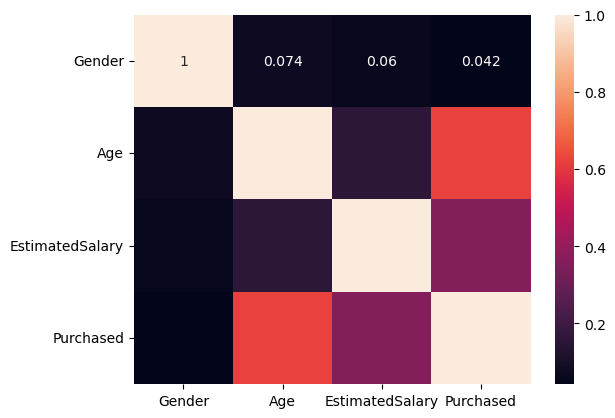

In [153]:
sns.heatmap(df.corr(),annot=True)
plt.show()

### Plot a countplot of gender with respect to purchased

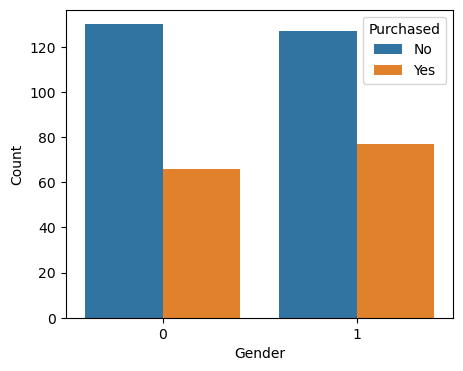

In [154]:
df['Gender'] = df['Gender'].astype(str)
df['Purchased'] = df['Purchased'].astype(str)
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Gender', hue='Purchased')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Purchased', labels=['No', 'Yes'])
plt.show()

### Plot a displot of Age

C:\Users\erinr\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 500x400 with 0 Axes>

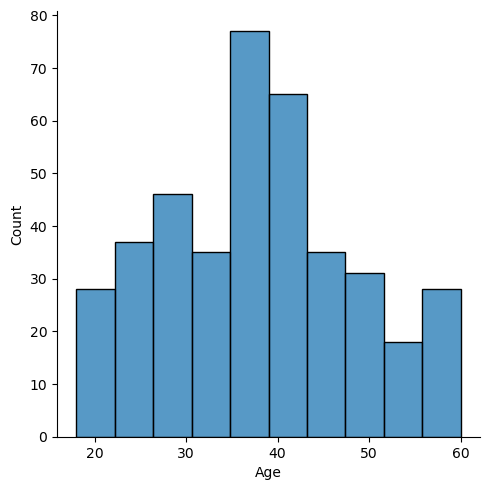

In [155]:
plt.figure(figsize=(5, 4))
sns.displot(df['Age']) 
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Plot pairplot of the dataset

C:\Users\erinr\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\erinr\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\erinr\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\erinr\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

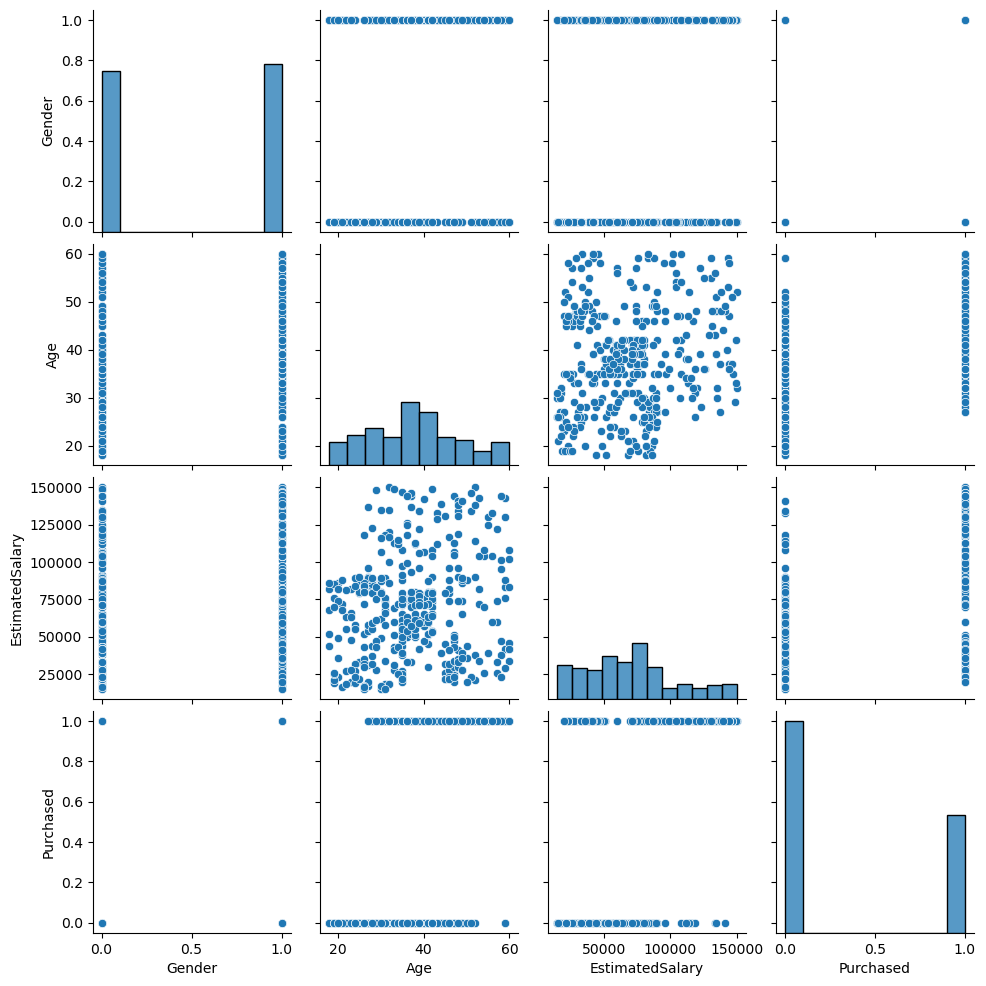

In [156]:
df['Gender'] = df['Gender'].astype(int)
df['Purchased'] = df['Purchased'].astype(int)
sns.pairplot(df) 
plt.show()

## Data Preprocessing

### Split the dataset into input and target variables

In [157]:
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

### Scale the data using StandardScaler

In [158]:
from sklearn.preprocessing import StandardScaler

In [159]:
scaler = StandardScaler()

In [160]:
xcolumns = X.columns.tolist()

In [161]:
X = scaler.fit_transform(X)

In [162]:
X = pd.DataFrame(X, columns = xcolumns)
X.head()

,Gender,Age,EstimatedSalary
0,-1.020204,-1.781797,-1.490046
1,-1.020204,-0.253587,-1.460681
2,0.980196,-1.113206,-0.785290
3,0.980196,-1.017692,-0.374182
4,-1.020204,-1.781797,0.183751


### Split the dataset into training and testing set

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=100)

### Check shape of X_train and X_test

In [165]:
X_train.shape

(300, 3)

In [166]:
X_test.shape

(100, 3)

## ML Models

### Logistic Regression Classifier

In [167]:
from sklearn.linear_model import LogisticRegression
from  sklearn import metrics
from sklearn.model_selection import cross_val_score

In [168]:
cv_score_list = {}
def model_score(model):
    model.fit(X_train,y_train)
    print('The score of our trained model is :',model.score(X_train,y_train),end='\n\n')
  
    y_pred = model.predict(X_test)
    print('The accuracy score of the model :',metrics.accuracy_score(y_test,y_pred),end='\n\n')
  
    print('confusion metrics')
    print(metrics.confusion_matrix(y_test,y_pred),end='\n\n')
    print('classification report')
    print(metrics.classification_report(y_test,y_pred))

    cv_score = np.mean(cross_val_score(model,X_train,y_train))
    print('Cross validation Score Mean :',cv_score)
    cv_score_list[str(model)[:-2]] = cv_score

In [169]:
model_score(LogisticRegression())

The score of our trained model is : 0.85

The accuracy score of the model : 0.87

confusion metrics
[[62  3]
 [10 25]]

classification report
              precision    recall  f1-score   support

           0       0.86      0.95      0.91        65
           1       0.89      0.71      0.79        35

    accuracy                           0.87       100
   macro avg       0.88      0.83      0.85       100
weighted avg       0.87      0.87      0.87       100

Cross validation Score Mean : 0.8366666666666666


### Random Forest Classifier

In [170]:
from sklearn.ensemble import RandomForestClassifier

In [171]:
model_score(RandomForestClassifier(n_estimators=20))

The score of our trained model is : 0.9966666666666667

The accuracy score of the model : 0.89

confusion metrics
[[62  3]
 [ 8 27]]

classification report
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        65
           1       0.90      0.77      0.83        35

    accuracy                           0.89       100
   macro avg       0.89      0.86      0.87       100
weighted avg       0.89      0.89      0.89       100

Cross validation Score Mean : 0.8833333333333332


### Support Vector Machine

In [172]:
from sklearn.svm import SVC

In [173]:
model_score(SVC())

The score of our trained model is : 0.9033333333333333

The accuracy score of the model : 0.92

confusion metrics
[[62  3]
 [ 5 30]]

classification report
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        65
           1       0.91      0.86      0.88        35

    accuracy                           0.92       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100

Cross validation Score Mean : 0.9033333333333333


### Assign cross val scores of all models into a dataframe

In [175]:
cv_score_list

{'LogisticRegression': 0.8366666666666666,
 'RandomForestClassifier(n_estimators=2': 0.8833333333333332,
 'SVC': 0.9033333333333333}

In [176]:
pd.DataFrame(cv_score_list,index=[0]).T.reset_index().rename(columns={'index':'Model',0:'Score'})

,Model,Score
0,LogisticRegression,0.836667
1,RandomForestClassifier(n_estimators=2,0.883333
2,SVC,0.903333


***

## Deploy the model with highest score using Tkinter

In [75]:
### In this case its SVM Classifier

#### Import all modules from Tkinter

In [177]:
from tkinter import *
from tkinter import *
from tkinter import ttk
import pickle
from PIL import Image, ImageTk
import numpy as np

### Define a function that will output to an entry box in Tkinter

In [193]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [194]:
def predict_output(age, estimated_salary, is_male=1):
    # Ensure observation includes all three features
    observation = np.array([age, estimated_salary, is_male])
    prediction_value = new_model.predict(observation.reshape(1, -1))
    
    if prediction_value[0] == 1:
        print('Person will Purchase')
    else:
        print('Person will not Purchase')
        
predict_output(22,20000,1)


Person will Purchase


C:\Users\erinr\anaconda3\New folder\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


### Create Tkinter window with all necessary entryboxes and labels

In [195]:
root = Tk()
root.geometry('500x500')
root.resizable(False,False)

with open('model.pkl','rb') as f:
    new_model = pickle.load(f)

def predict_out():
    if gender_var.get() == 'male':
        gender=1
    else:
        gender=0
        
    observation = np.array([int(age_entry.get()),
              int(salary_entry.get())
             ])
    print(observation.reshape(1,-1))
    prediction_value = new_model.predict(observation.reshape(1,-1))
    if prediction_value[0]==1:
        prediction_var.set('Person will Purchase')
    else:
        prediction_var.set('Person will not Purchase')

# Main Title
Label(master=root,text='Customer Classification',bg='#ffd966',fg='White',font=('serif',28,'bold'),width='30',height=2).pack()

# New Frame for Input form
input_frame = Frame(root,width=500,height=400,highlightbackground='#ffd966',highlightthickness=7)
input_frame.place(x=0,y=100)



# label for age
age_label = Label(master=input_frame,text='Enter Age',bg='#ffd966',fg='Black',width='25',height=2,font=('serif',10,'bold'))
age_label.place(x=30,y=60)

# Entry space for age
age_entry = Entry(master=input_frame,width='16',bg='#ffd966',font=('Ariel',15),fg='Black')
age_entry.place(x=280,y=67)

# Variable to store radiobutton chooosing value
gender_var = IntVar()
# setting defualt
gender_var.set(0)

# gender label
Gender_label = Label(master=input_frame,text='Choose your Gender',bg='#ffd966',fg='Black',width='25',height=2,font=('serif',10,'bold'))
Gender_label.place(x=30,y=125)

# gender radio button - Male
radio_male = Radiobutton(master=input_frame,text='Male   ',value=0,variable=gender_var,bg='#ffd966',font=('serif',12,'bold'))
radio_male.place(x=380,y=130)

# gender radio button - Male
radio_female = Radiobutton(master=input_frame,text='Female',value=1,variable=gender_var,bg='#ffd966',font=('serif',12,'bold'))
radio_female.place(x=280,y=130)



# Variable to store radiobutton chooosing value
salary_var = IntVar()

# label for age
salary_label = Label(master=input_frame,text='Enter Salary',bg='#ffd966',fg='Black',width='25',height=2,font=('serif',10,'bold'))
salary_label.place(x=30,y=195)

# Entry space for age
salary_entry = Entry(master=input_frame,width='16',bg='#ffd966',fg='Black',font=('serif',15))
salary_entry.place(x=280,y=200)


# Prediction Button and Entry
prediction_var = StringVar()
prediction_var.set(' ')
predict_button = Button(input_frame, text = 'Predict',width=10 , bg='#ffd966',fg='Black',font=('serif',10,'bold'),command=predict_out)
predict_button.place(x=196,y=320)
prediction_entry = Entry(master=input_frame,width=21,bd=5,bg='#ffd966',textvariable=prediction_var,font=('serif',12,'bold'))
prediction_entry.place(x=147,y=270)


root.mainloop()

[[  21 5000]]


C:\Users\erinr\anaconda3\New folder\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\erinr\anaconda3\New folder\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\erinr\AppData\Local\Temp\ipykernel_4548\1251085908.py", line 18, in predict_out
    prediction_value = new_model.predict(observation.reshape(1,-1))
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\erinr\anaconda3\New folder\Lib\site-packages\sklearn\svm\_base.py", line 820, in predict
    y = super().predict(X)
        ^^^^^^^^^^^^^^^^^^
  File "C:\Users\erinr\anaconda3\New folder\Lib\site-packages\sklearn\svm\_base.py", line 433, in predict
    X = self._validate_for_predict(X)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\erinr\anaconda

***

# <span style = "color:green;font-size:40px"> Great Job! </span>